<h1><center>Etude de marché avec Kmeans</center></h1>

Découvrons le fonctionnement de Kmeans


http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [1]:
# J'importe les librairies et les modules qui vont me servir 
import pandas as pd

import numpy as np

from sklearn import decomposition
from sklearn import preprocessing

from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_final = pd.read_csv('df_final.csv').dropna()

J'ai détecté 3 outliers :  
* l'Inde
* Les États-Unis d'Amérique
* Le Brésil

J'ai décidé de les retirer car l'algorithme de Kmeans est sensible aux outliers.

In [3]:
df_final_ss_outliers = df_final.loc[(df_final['Zone']=='États-Unis d\'Amérique')|(df_final['Zone']=='Inde')|(df_final['Zone']=='Brésil'),:]

In [4]:
df_final.set_index('Zone', inplace = True)

In [5]:
df_final_ss= ['Inde','États-Unis d\'Amérique','Brésil']

In [6]:
df_final = df_final.drop(df_final_ss)

In [7]:
df_final.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
Afghanistan,1.53,0.54,57.0,-1.53,29.0,2058.4,-2.80,36296.113,5590.381,0.628952
Afrique du Sud,35.69,14.11,2118.0,63.00,514.0,12701.3,-0.28,57009.756,8692.812,14.726128
Albanie,16.36,6.26,47.0,0.00,38.0,12771.0,0.38,2884.169,1603.534,4.086025
Algérie,6.38,1.97,277.0,0.00,2.0,11737.4,-0.92,41389.189,1340.390,1.782229
Allemagne,19.47,7.96,1739.0,646.00,842.0,52952.9,0.59,82658.409,880.187,6.654367


## ACP<a class="anchor" id="chapter1"></a>

Analyse en composantes principales

In [8]:
# préparation des données 

X= df_final
names = df_final.index
nom_variable = df_final.columns

In [9]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [10]:
X.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
Afghanistan,1.53,0.54,57.0,-1.53,29.0,2058.4,-2.80,36296.113,5590.381,0.628952
Afrique du Sud,35.69,14.11,2118.0,63.00,514.0,12701.3,-0.28,57009.756,8692.812,14.726128
Albanie,16.36,6.26,47.0,0.00,38.0,12771.0,0.38,2884.169,1603.534,4.086025
Algérie,6.38,1.97,277.0,0.00,2.0,11737.4,-0.92,41389.189,1340.390,1.782229
Allemagne,19.47,7.96,1739.0,646.00,842.0,52952.9,0.59,82658.409,880.187,6.654367


In [11]:
# Calcul des composantes principales

pca = decomposition.PCA(n_components=10) #correspond aux 10 variables 
pca.fit(X_scaled)

PCA(n_components=10)

In [12]:
#Variance 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())

[3.73109124 2.25247322 1.53493338 0.81416852 0.68325841 0.49163336
 0.28395291 0.21431246 0.04885546 0.00983717]
[0.3707174  0.59452083 0.74703023 0.82792518 0.89581304 0.94466122
 0.97287449 0.99416836 0.99902259 1.        ]


In [13]:
# Je crée une df qui affiche la variance expliquée pour chaque dimension.
variance = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(10)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
variance

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.731091,37.0,37.0
1,Dim2,2.252473,22.0,59.0
2,Dim3,1.534933,15.0,75.0
3,Dim4,0.814169,8.0,83.0
4,Dim5,0.683258,7.0,90.0
5,Dim6,0.491633,5.0,94.0
6,Dim7,0.283953,3.0,97.0
7,Dim8,0.214312,2.0,99.0
8,Dim9,0.048855,0.0,100.0
9,Dim10,0.009837,0.0,100.0


--> avec 3 vecteurs, on traite 75% de l'info donc c'est plutôt bien

In [14]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

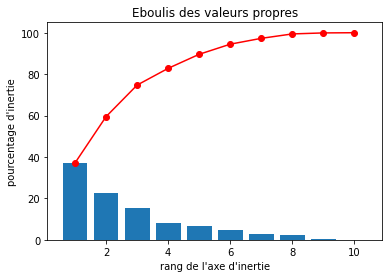

In [15]:
display_scree_plot(pca)

In [15]:
# Calcul des composantes principales
n_comp = 3
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=3)

In [16]:
# Fonction qui me permet d'afficher mes cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

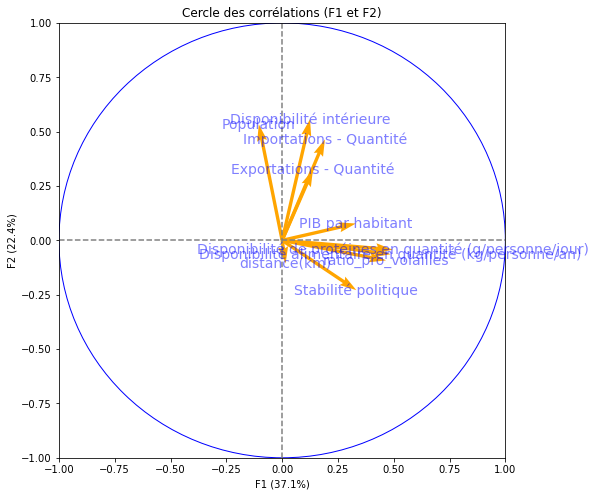

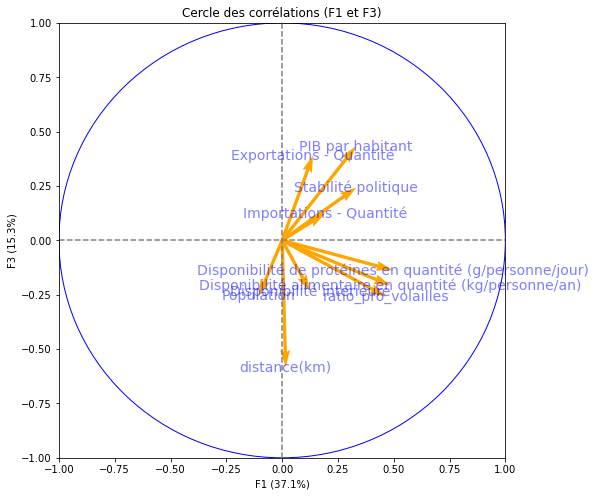

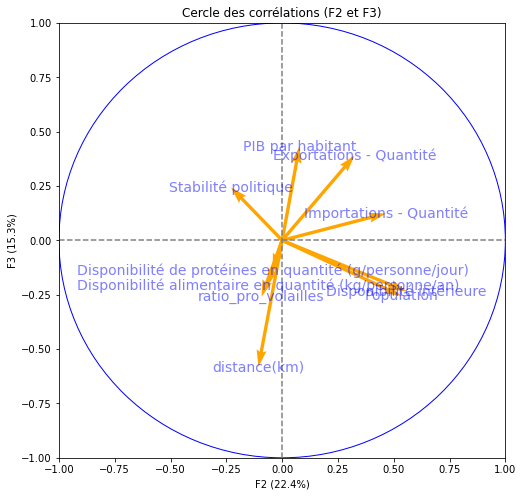

In [17]:
pcs = pca.components_
display_circles(pcs,n_comp , pca, [(0,1),(0,2),(1,2)], labels = np.array(nom_variable))

In [18]:
# Fonction qui permet de projeter les individus sur les dimensions 
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(8,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

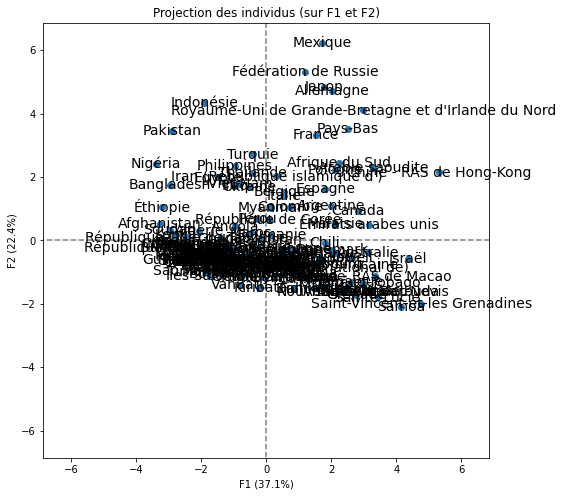

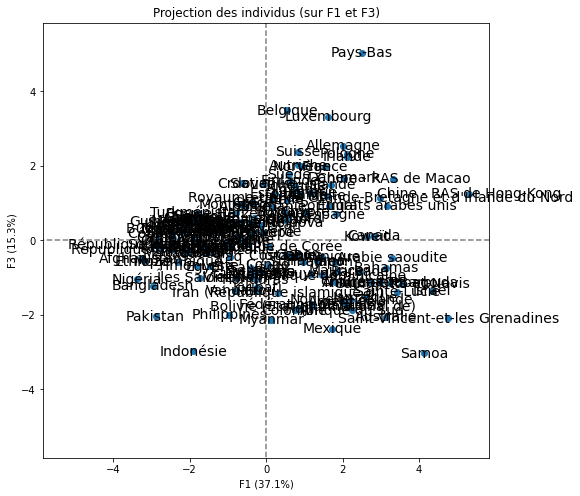

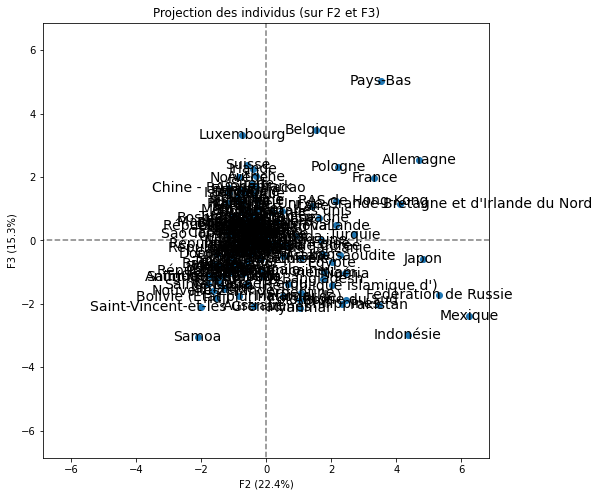

<Figure size 432x288 with 0 Axes>

In [20]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(names))
plt.figure()
plt.show()

## Kmeans<a class="anchor" id="chapter3"></a>

In [15]:
# Je reprend mes données réduites et je les renomme
Y = X_scaled


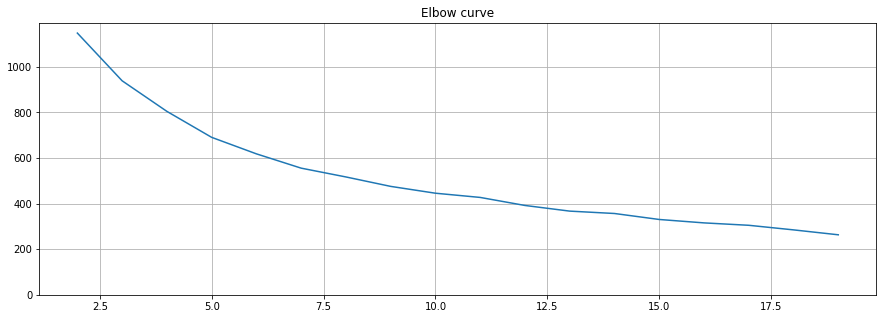

In [18]:
# Création de la courbe en coude
silhouette = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k) # création d'un objet de clustering
    kmeans.fit(Y) # clustering sur les données normalisées
    silhouette.append(kmeans.inertia_) # calcul du coefficient de silhouette

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), silhouette)
plt.grid(True)
plt.title('Elbow curve')
plt.ylim(ymin=0)
plt.show()

In [21]:
#Création d'une PCA pour projeter les données et observer les clusters avec le module decomposition
pca = decomposition.PCA(n_components=10).fit(Y)
Y_projected = pca.transform(Y)

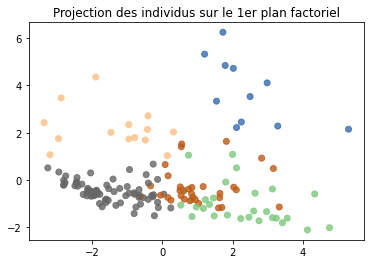

In [22]:
# Clustering par K-means
km = KMeans(n_clusters=5, random_state=3)
km.fit(Y)
# Récupération des clusters attribués à chaque individu
clusters = km.labels_
# Affichage du clustering par projection des individus sur le premier plan factoriel
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=clusters.astype(float),cmap='Accent', alpha=.8)
plt.title("Projection des individus sur le 1er plan factoriel")
plt.show()

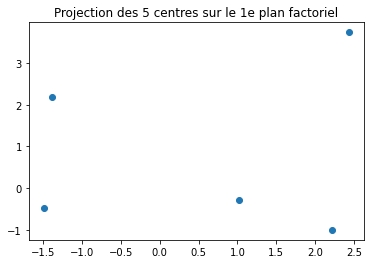

In [23]:
# Affichage des positions des centres de classes
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

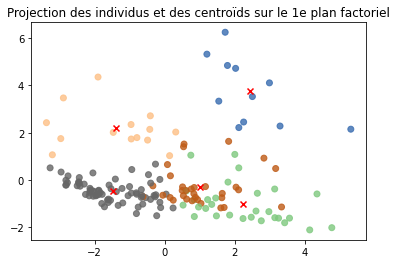

In [24]:
# Création d'un graphique avec la projection des individus et des centres des clusters
plt.scatter(Y_projected[:, 0], Y_projected[:, 1], c=clusters.astype(float),cmap='Accent', alpha=.8)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], c='red', marker='x')
plt.title("Projection des individus et des centroïds sur le 1e plan factoriel".format(len(centroids)))
plt.show()

In [25]:
#mise à l'échelle des données
df_final_k_scaled = pd.DataFrame(X_scaled, columns= list(nom_variable), index=df_final.index)

In [26]:
df_final_k_scaled.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
Zone,,,,,,,,,,
Afghanistan,-1.194325,-1.192373,-0.486105,-0.321940,-0.319902,-0.881247,-3.102482,0.275499,-0.058274,-1.255213
Afrique du Sud,0.994959,1.263464,2.317011,0.024321,2.230278,-0.370258,-0.267938,0.783200,0.741152,1.511021
Albanie,-0.243884,-0.157193,-0.499706,-0.313730,-0.272579,-0.366911,0.474443,-0.543444,-1.085594,-0.576845
Algérie,-0.883493,-0.933578,-0.186888,-0.313730,-0.461870,-0.416537,-0.987822,0.400332,-1.153401,-1.028910
Allemagne,-0.044567,0.150465,1.801543,3.152631,3.954935,1.562311,0.710655,1.411860,-1.271984,-0.072869


In [27]:
# Regroupement des clusters par pays
clusters = km.labels_
df_clusters = pd.DataFrame(index=[df_final.index])
df_clusters['Clusters'] = clusters
df_clusters = df_clusters.reset_index()
df_clusters.head()

,Zone,Clusters
0,Afghanistan,4
1,Afrique du Sud,2
2,Albanie,4
3,Algérie,4
4,Allemagne,2


In [28]:
# Jointure de mes fichiers
df_final_k = pd.merge(df_final_k_scaled,df_clusters, on='Zone')

In [29]:
df_final_k = df_final_k.sort_values('Clusters')

In [30]:
df_final_k.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles,Clusters
106,Panama,0.875112,0.581186,-0.302495,-0.313730,-0.367225,0.481743,0.485691,-0.513477,0.735558,0.843998,0
29,Chili,1.037898,0.919610,0.350342,0.303347,0.342619,0.194817,0.519436,-0.161417,1.506602,0.893667,0
33,Colombie,0.757829,0.441835,1.670975,-0.302998,-0.062255,-0.299680,-0.819099,0.584667,0.744982,0.906722,0
119,République dominicaine,0.967400,0.678913,-0.053601,-0.281534,-0.251546,-0.176572,0.226983,-0.356455,0.350953,1.463274,0
35,Costa Rica,0.407262,0.145036,-0.381379,-0.297632,-0.382999,-0.003171,0.733151,-0.492810,0.799551,0.232093,0


In [31]:
df_final_k_moy = df_final_k.groupby('Clusters').agg(['mean'])

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_9080\1519555366.py:1: FutureWarning: ['Zone'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_final_k_moy = df_final_k.groupby('Clusters').agg(['mean'])


In [32]:
df_final_k_moy

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusters,,,,,,,,,,
0,1.470853,1.320065,-0.094403,-0.265968,-0.319358,0.062747,0.538829,-0.414757,0.778917,1.517450
1,-0.450525,-0.483466,0.996961,0.280109,0.000467,-0.498674,-1.470691,2.173326,0.152019,-0.459554
2,0.685641,0.851662,2.168516,2.037015,2.969280,0.918148,0.288337,1.089186,-0.385558,0.591147
3,0.195347,0.326011,-0.186548,0.094916,0.003636,1.269310,0.914528,-0.332556,-0.915874,0.055773
4,-0.716294,-0.733057,-0.415770,-0.309327,-0.336051,-0.650797,-0.392471,-0.281970,0.126175,-0.655138


## Heatmap<a class="anchor" id="section_3_1"></a>

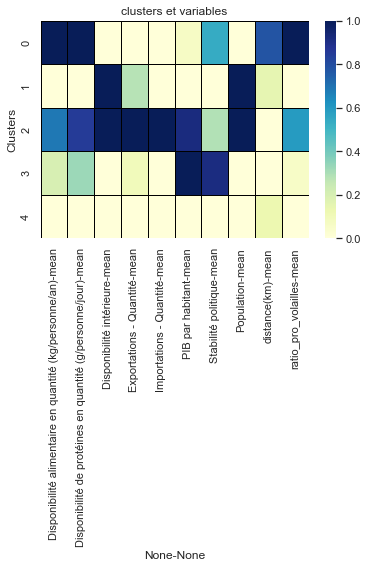

In [33]:
plt.figure()
sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(df_final_k_moy,cmap ="YlGnBu", linecolor='black',linewidths=1,vmin=0, vmax=1 )
plt.title('clusters et variables')
plt.show()

## Diagramme de Kiviat<a class="anchor" id="section_3_3"></a>

In [35]:
df_final_k_moy

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Clusters,,,,,,,,,,
0,1.470853,1.320065,-0.094403,-0.265968,-0.319358,0.062747,0.538829,-0.414757,0.778917,1.517450
1,-0.450525,-0.483466,0.996961,0.280109,0.000467,-0.498674,-1.470691,2.173326,0.152019,-0.459554
2,0.685641,0.851662,2.168516,2.037015,2.969280,0.918148,0.288337,1.089186,-0.385558,0.591147
3,0.195347,0.326011,-0.186548,0.094916,0.003636,1.269310,0.914528,-0.332556,-0.915874,0.055773
4,-0.716294,-0.733057,-0.415770,-0.309327,-0.336051,-0.650797,-0.392471,-0.281970,0.126175,-0.655138


In [36]:
dk1 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy.iloc[0].values});
dk2 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy.iloc[1].values});
dk3 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy.iloc[2].values});
dk4 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy.iloc[3].values});
dk5 = pd.DataFrame({'Col A': ['Dispo alimentaire', 'Dispo protéines volailles', 'Disponibilité intérieure',
                             'Exportations', 'Importations', 'PIB par habitant','Stabilité politique',
                             'Population','distance(km)','ratio_pro_volailles'], 'Col B':df_final_k_moy.iloc[4].values});


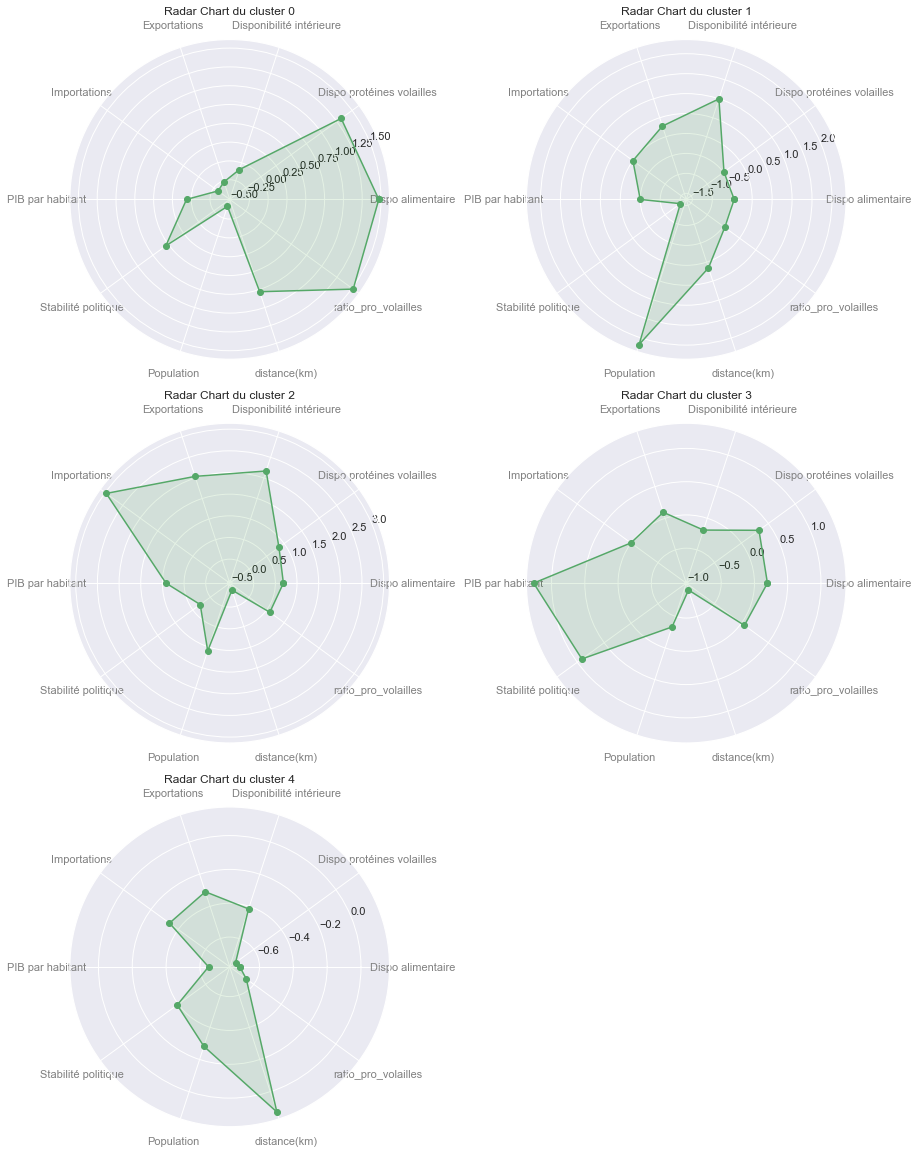

In [37]:
fig = plt.figure(figsize=(15, 20))

ax = fig.add_subplot(321, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(dk1) + 1) / float(len(dk1)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = dk1['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk1['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 0")

ax = fig.add_subplot(322, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(dk2) + 1) / float(len(dk2)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = dk2['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk2['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 1")

ax = fig.add_subplot(323, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(dk3) + 1) / float(len(dk3)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = dk3['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk3['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 2")

ax = fig.add_subplot(324, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(dk4) + 1) / float(len(dk4)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = dk4['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk4['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 3")

ax = fig.add_subplot(325, projection="polar")
# theta has different angles, and the first one repeated
theta = np.arange(len(dk5) + 1) / float(len(dk5)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = dk5['Col B'].values
values = np.append(values, values[0])
# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], dk5['Col A'], color='grey', size=11)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)
# shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Radar Chart du cluster 4")

plt.show()

le cluster 2 semble être le candidat idéal.

In [38]:
cluster_2 = df_final_k.loc[df_final_k['Clusters']==2]

In [39]:
cluster_2.sort_values('Zone')

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,PIB par habitant,Stabilité politique,Population,distance(km),ratio_pro_volailles,Clusters
1,Afrique du Sud,0.994959,1.263464,2.317011,0.024321,2.230278,-0.370258,-0.267938,0.783200,0.741152,1.511021,2
4,Allemagne,-0.044567,0.150465,1.801543,3.152631,3.954935,1.562311,0.710655,1.411860,-1.271984,-0.072869,2
7,Arabie saoudite,1.486522,1.527688,1.388079,-0.260071,3.323963,1.291200,-0.605383,0.197189,-0.289123,1.798458,2
30,Chine - RAS de Hong-Kong,2.137026,2.738414,-0.182808,3.243851,4.296712,1.893418,0.980612,-0.435055,0.985085,1.409182,2
46,France,0.175259,0.329631,1.575770,2.374578,2.188213,1.160170,0.361961,0.975184,-1.485905,-0.062402,2
47,Fédération de Russie,0.693099,0.599284,5.632876,0.303347,0.715945,0.264709,-0.672873,2.952875,-0.856060,0.310606,2
69,Japon,-0.106733,0.020163,2.720954,-0.260071,5.148525,0.986822,1.295561,2.511016,1.007285,0.066349,2
91,Mexique,0.791796,0.385733,5.174531,-0.265437,4.638489,-0.033212,-0.762858,2.444215,0.873598,0.335204,2
108,Pays-Bas,0.010550,0.244572,-0.057681,7.295093,2.724540,1.664851,1.081845,-0.196935,-1.388524,-0.119837,2
110,Pologne,0.649518,0.906942,1.008618,5.186301,-0.183191,0.463388,0.631918,0.316114,-1.146240,0.494375,2


In [61]:
cluster_2["Zone"]

91                                               Mexique
114    Royaume-Uni de Grande-Bretagne et d'Irlande du...
69                                                 Japon
1                                         Afrique du Sud
7                                        Arabie saoudite
46                                                France
47                                  Fédération de Russie
108                                             Pays-Bas
30                              Chine - RAS de Hong-Kong
110                                              Pologne
4                                              Allemagne
Name: Zone, dtype: object

<h1><center> EXERCICE <h1><center>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

Nous allons travailler sur le jeu de données iris.

In [20]:
sns.set()

Chargeons les données. Nous utiliserons le dataframe iris, directement présent dans scikit-learn.

Il faudra travailler un peu pour pouvoir l'utiliser correctement. Ne pretez pas trop attention aux lignes ci dessous.


In [21]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = [i.split('(')[0].replace(" ", "_")[:-1] for i in df.columns]
X = df.copy()
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Nous allons effectuer un clustering avec l'algorithme du k-means.

Testons tout d'abord avec un nombre défini de clusters.

On instancie notre estimateur avec k = 3:


In [ ]:
kmeans = _________________

On l'entraine : 

In [ ]:
_____________

On peut calculer son inertie : 

In [ ]:
kmeans.inertia_

Passons à la méthode du coude.

On défini d'abord une liste vide pour sotcker nos inerties:


In [ ]:
intertia = []

On défini ensuite la liste du nombre de clusters que l'on veut tester:

In [ ]:
k_list = range(1, 10)
list(k_list)

Ensuite, pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie : 

In [ ]:
for i in k_list :
    ____________________________

Nous obtenons une liste d'inerties :

In [ ]:
intertia

Il ne nous reste plus qu'à afficher le resultat :

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

Regardons maintenant les clusters que nous avons obtenus.

Nous devons d'abord ré-entrainer un estimateur:


In [ ]:
kmeans = ___________
kmeans.____

-- ATTENTION --
Ici, 0,1,2 est à considérer comme une variable catégorielle cardinale. Il n'y a pas d'ordre entre les clusters.

Le cluster 0 n'est pas supérieur au cluster 1 par exemple. Considérez que c'est plus un id qu'une valeur.

Pour être plus clair, nous allons utiliser des lettres plutôt que des nombres:


In [ ]:
dd = {i:j for i,j in enumerate(list("abc"))}
dd

In [ ]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

Disons que c'est plus clair maintenant...

Ajoutons nos labels à X


In [ ]:
X["cluster"] = labels
X

In [ ]:
Affichons cela de façon graphique :

In [ ]:
sns.pairplot(X, hue="cluster")